In [1]:
import tensorflow as tf
import tensorflow_gnn as tfgnn
import networkx as nx
import numpy as np
import importlib
from generators import *
from viz_tools import *
import matplotlib.pyplot as plt

2022-03-02 00:49:31.147836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 00:49:31.147891: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(img , img_lbl), _ = tf.keras.datasets.mnist.load_data()
print(img.shape)
print(img[0].shape)
print(img_lbl[0])

(60000, 28, 28)
(28, 28)
5


In [4]:
gen = graph_tensor_generator(img, img_lbl)
graph_tensor = next(gen)
print(graph_tensor[0].spec)

GraphTensorSpec({'context': ContextSpec({}, TensorShape([]), tf.int32, None), 'node_sets': {'pixel': NodeSetSpec({'features': {'hidden_state': TensorSpec(shape=(784,), dtype=tf.uint8, name=None)}, 'sizes': TensorSpec(shape=(1,), dtype=tf.int32, name=None)}, TensorShape([]), tf.int32, None)}, 'edge_sets': {'connected': EdgeSetSpec({'features': {}, 'sizes': TensorSpec(shape=(1,), dtype=tf.int32, name=None), 'adjacency': AdjacencySpec({'#index.0': TensorSpec(shape=(1512,), dtype=tf.int64, name=None), '#index.1': TensorSpec(shape=(1512,), dtype=tf.int64, name=None)}, TensorShape([]), tf.int32, {'#index.0': 'pixel', '#index.1': 'pixel'})}, TensorShape([]), tf.int32, None)}}, TensorShape([]), tf.int32, None)


In [10]:
# graph_tensor = next()
tfgnn.graph_tensor_to_values(graph_tensor)

{'context': {'label': [5]},
 'node_sets': {'pixel': {'hidden_state': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
   

{'context': {'label': [3]}, 'node_sets': {'pixel': {'hidden_state': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 118, 219, 166, 118, 118, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 103, 242, 254, 254, 254, 254, 254, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 232, 254, 254, 254, 254, 254, 238, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 244, 254, 224, 254, 254, 254, 141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 207, 254, 210, 254, 254, 254, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 206, 254, 254, 254, 254, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

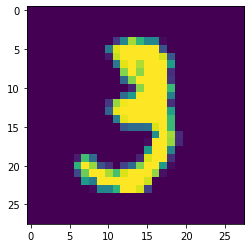

In [21]:
graph_tesnor_2 = next(gen)
tensor_dict = tfgnn.graph_tensor_to_values(graph_tesnor_2)
print(tensor_dict)
values = np.array(tensor_dict["node_sets"]["pixel"]["hidden_state"])
values = np.reshape(values, (28, 28))
print(values.shape)
plt.imshow(values)
plt.show()